In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path.cwd().parent   # one level up from notebook folder
DATA_DIR = PROJECT_ROOT / "data" / "ncvs"

rape_fp = DATA_DIR / "Rate of rape_sexual assault victimizations by sex, 1993 to 2023.csv"
violent_fp = DATA_DIR / "Rate of violent victimizations by sex, 1993 to 2023.csv"

print("Rape file path exists?", rape_fp.exists())
print("Violent file path exists?", violent_fp.exists())

rape_df = pd.read_csv(rape_fp)
violent_df = pd.read_csv(violent_fp)

print("Rape/Sexual Assault:")
print(rape_df.head())

print("\nViolent Victimizations:")
print(violent_df.head())

Rape file path exists? True
Violent file path exists? True
Rape/Sexual Assault:
                                                                                                                                                                                             Rate of rape/sexual assault victimizations by sex, 1993 to 2023
Year Sex  Crime Type          Number Number CI Lower Bound Number CI Upper Bound Number SE Number Flag Rate per 1000 persons age 12 or older Rate CI Lower Bound Rate CI Upper Bound Rate SE                                          Rate Flag             
1993 Male Rape/sexual assault 63,526 24,068                102,984               20,132    0           0.6                                   0.24                1.01                0.20                                                     0             
1994 Male Rape/sexual assault 56,463 25,301                87,625                15,899    0           0.5                                   0.25                

## Check the first few rows

In [2]:
print(rape_df.head())
print(rape_df.columns.tolist())

                                                                                                                                                                                             Rate of rape/sexual assault victimizations by sex, 1993 to 2023
Year Sex  Crime Type          Number Number CI Lower Bound Number CI Upper Bound Number SE Number Flag Rate per 1000 persons age 12 or older Rate CI Lower Bound Rate CI Upper Bound Rate SE                                          Rate Flag             
1993 Male Rape/sexual assault 63,526 24,068                102,984               20,132    0           0.6                                   0.24                1.01                0.20                                                     0             
1994 Male Rape/sexual assault 56,463 25,301                87,625                15,899    0           0.5                                   0.25                0.85                0.15                                                     0  

## Skip first line to ID columns and separate from title of data

In [3]:
# Read rape/sexual assault file
rape_df = pd.read_csv(rape_fp, sep=",", skiprows=1)

# Read violent victimization file
violent_df = pd.read_csv(violent_fp, sep=",", skiprows=1)

# Check that the columns look correct
print("Rape columns:", rape_df.columns.tolist())
print("Violent columns:", violent_df.columns.tolist())

# Preview first few rows
print(rape_df.head())
print(violent_df.head())

Rape columns: ['Year', 'Sex', 'Crime Type', 'Number', 'Number CI Lower Bound', 'Number CI Upper Bound', 'Number SE', 'Number Flag', 'Rate per 1000 persons age 12 or older', 'Rate CI Lower Bound', 'Rate CI Upper Bound', 'Rate SE', 'Rate Flag']
Violent columns: ['Year', 'Sex', 'Crime Type', 'Number', 'Number CI Lower Bound', 'Number CI Upper Bound', 'Number SE', 'Number Flag', 'Rate per 1000 persons age 12 or older', 'Rate CI Lower Bound', 'Rate CI Upper Bound', 'Rate SE', 'Rate Flag']
   Year   Sex           Crime Type  Number Number CI Lower Bound  \
0  1993  Male  Rape/sexual assault  63,526                24,068   
1  1994  Male  Rape/sexual assault  56,463                25,301   
2  1995  Male  Rape/sexual assault  69,790                36,416   
3  1996  Male  Rape/sexual assault  44,032                17,451   
4  1997  Male  Rape/sexual assault  46,461                14,998   

  Number CI Upper Bound Number SE  Number Flag  \
0               102,984    20,132          0.0   
1 

## Average rate of rape/sexual assault per 1000 by sex 

In [4]:
print(rape_df.groupby("Sex")["Rate per 1000 persons age 12 or older"].mean())

Sex
Female    2.948387
Male      0.380645
Name: Rate per 1000 persons age 12 or older, dtype: float64


## Average rate of violent victimization per 1000 by sex

In [5]:
print(violent_df.groupby("Sex")["Rate per 1000 persons age 12 or older"].mean())

Sex
Female    30.738710
Male      37.216129
Name: Rate per 1000 persons age 12 or older, dtype: float64


## In one frame

In [6]:
avg_rates = {
    "Rape/Sexual Assault": rape_df.groupby("Sex")["Rate per 1000 persons age 12 or older"].mean(),
    "Violent Victimization": violent_df.groupby("Sex")["Rate per 1000 persons age 12 or older"].mean()
}

avg_rates_df = pd.DataFrame(avg_rates)
print(avg_rates_df)

        Rape/Sexual Assault  Violent Victimization
Sex                                               
Female             2.948387              30.738710
Male               0.380645              37.216129


## Visualizations

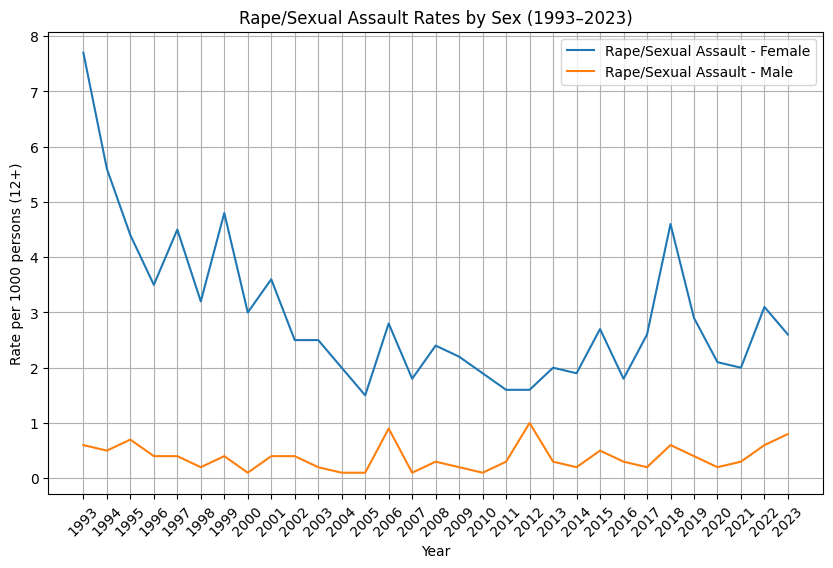

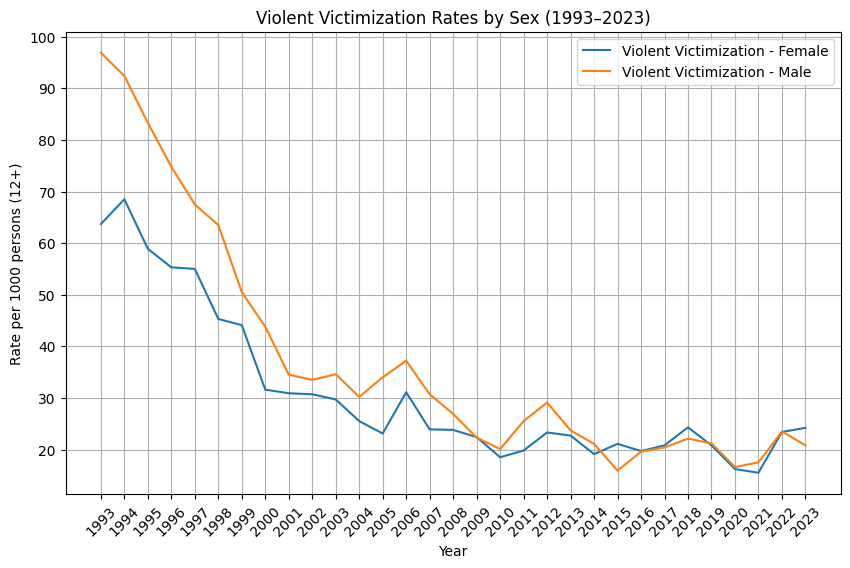

In [7]:
import matplotlib.pyplot as plt

# --- Rape/Sexual Assault Rates by Sex ---
plt.figure(figsize=(10,6))
for sex, group in rape_df.groupby("Sex"):
    plt.plot(group["Year"], 
             group["Rate per 1000 persons age 12 or older"], 
             label=f"Rape/Sexual Assault - {sex}")

plt.xlabel("Year")
plt.ylabel("Rate per 1000 persons (12+)")
plt.title("Rape/Sexual Assault Rates by Sex (1993–2023)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# --- Violent Victimization Rates by Sex ---
plt.figure(figsize=(10,6))
for sex, group in violent_df.groupby("Sex"):
    plt.plot(group["Year"], 
             group["Rate per 1000 persons age 12 or older"], 
             label=f"Violent Victimization - {sex}")

plt.xlabel("Year")
plt.ylabel("Rate per 1000 persons (12+)")
plt.title("Violent Victimization Rates by Sex (1993–2023)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Bring in ATUS cleaned data

In [8]:
atus_fp = "../data/atus/atus_data_processed.csv"
atus_df = pd.read_csv(atus_fp)

print(atus_df.head())

   YEAR          CASEID  SERIAL  STRATA  PERNUM  LINENO          WT06  WT20  \
0  2003  20030100013280       1   600.0       1       1  8.155463e+06   NaN   
1  2003  20030100013344       2   600.0       1       1  1.735323e+06   NaN   
2  2003  20030100013352       3   600.0       1       1  3.830527e+06   NaN   
3  2003  20030100013848       4  1302.0       1       1  6.622023e+06   NaN   
4  2003  20030100014165       5  2103.0       1       1  3.068387e+06   NaN   

   AGE  SEX  RELATE  AGE_CPS8  SEX_CPS8  time_online  
0   60    1      10        60         1          325  
1   41    2      10        41         2           60  
2   26    2      10        25         2          120  
3   36    2      10        36         2          265  
4   51    1      10        50         1           60  


In [23]:
print(atus_df.columns)
print(violent_df.columns)
print(rape_df.columns)
print(rape_df.columns.tolist())

Index(['YEAR', 'CASEID', 'SERIAL', 'STRATA', 'PERNUM', 'LINENO', 'WT06',
       'WT20', 'AGE', 'SEX', 'RELATE', 'AGE_CPS8', 'SEX_CPS8', 'time_online'],
      dtype='object')
Index(['Year', 'Sex', 'Crime Type', 'Number', 'Number SE', 'Number Flag',
       'Rate per 1000 persons age 12 or older', 'Rate SE', 'Rate Flag'],
      dtype='object')
Index(['Year', 'Sex', 'Crime Type', 'Number', 'Number SE', 'Number Flag',
       'Rate per 1000 persons age 12 or older', 'Rate SE', 'Rate Flag'],
      dtype='object')
['Year', 'Sex', 'Crime Type', 'Number', 'Number SE', 'Number Flag', 'Rate per 1000 persons age 12 or older', 'Rate SE', 'Rate Flag']


## Only gather these columns

In [22]:

atus_sub = atus_df[['YEAR', 'AGE', 'SEX', 'time_online']]

print(atus_sub.head())

   YEAR  AGE  SEX  time_online
0  2003   60    1          325
1  2003   41    2           60
2  2003   26    2          120
3  2003   36    2          265
4  2003   51    1           60


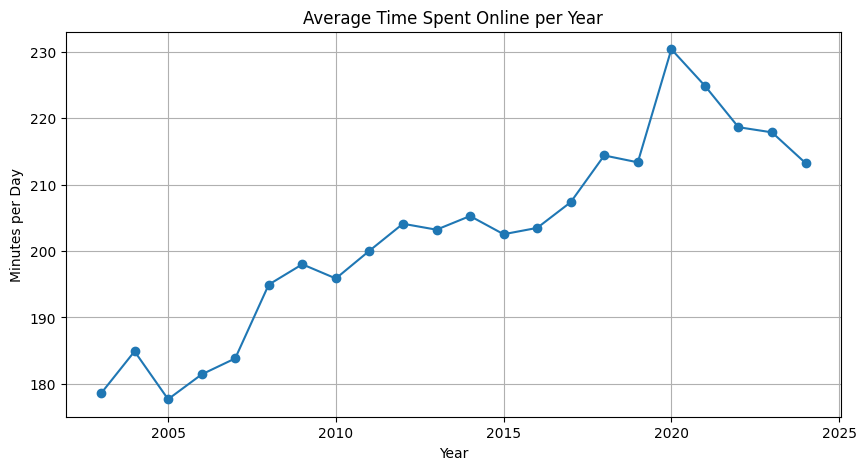

In [24]:
import matplotlib.pyplot as plt

avg_time_by_year = atus_sub.groupby('YEAR')['time_online'].mean()

plt.figure(figsize=(10,5))
avg_time_by_year.plot(marker='o')
plt.title("Average Time Spent Online per Year")
plt.ylabel("Minutes per Day")
plt.xlabel("Year")
plt.grid(True)
plt.show()

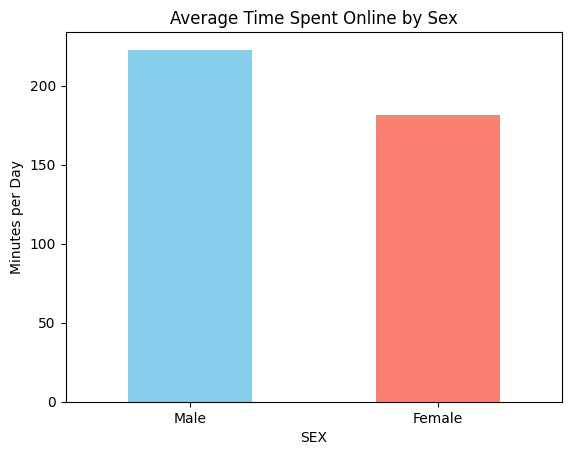

In [25]:
avg_time_by_sex = atus_sub.groupby('SEX')['time_online'].mean()

avg_time_by_sex.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Average Time Spent Online by Sex")
plt.ylabel("Minutes per Day")
plt.xticks(ticks=[0,1], labels=['Male','Female'], rotation=0)
plt.show()

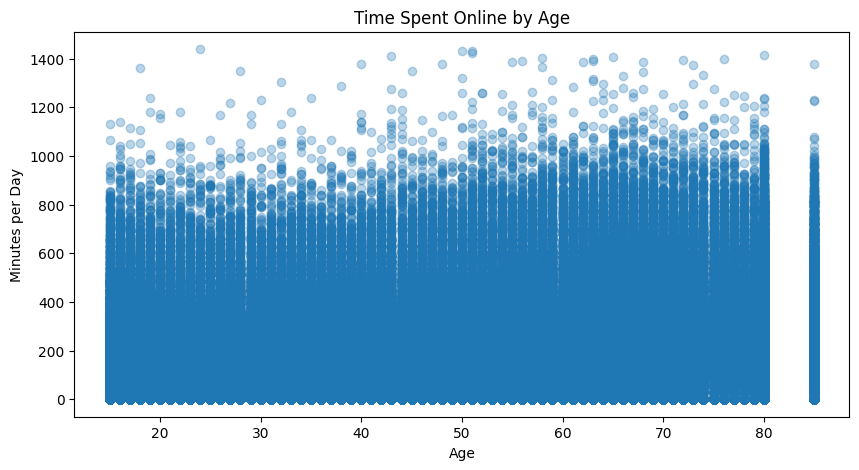

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(atus_sub['AGE'], atus_sub['time_online'], alpha=0.3)
plt.title("Time Spent Online by Age")
plt.xlabel("Age")
plt.ylabel("Minutes per Day")
plt.show()

In [ ]:
rape_df = rape_df[['Year', 'Sex', 'VictimizationRate']].dropna()
violent_df = violent_df[['Year', 'Sex', 'VictimizationRate']].dropna()

# Convert Year to integer if needed
rape_df['Year'] = pd.to_numeric(rape_df['Year'], errors='coerce').astype('Int64')
violent_df['Year'] = pd.to_numeric(violent_df['Year'], errors='coerce').astype('Int64')

In [27]:
atus_men_online = (
    atus_df[atus_df['SEX'] == 1]
    .groupby('YEAR')['time_online']
    .mean()
    .reset_index(name='avg_time_online_men')
)

In [29]:
# Violent crime rates against women
violent_women = (
    violent_df[violent_df['Sex'] == 'Female']
    .groupby('Year')['Rate per 1000 persons age 12 or older']
    .mean()
    .reset_index(name='violent_rate_women')
)

# Rape rates against women
rape_women = (
    rape_df[rape_df['Sex'] == 'Female']
    .groupby('Year')['Rate per 1000 persons age 12 or older']
    .mean()
    .reset_index(name='rape_rate_women')
)

In [36]:
print("ATUS Men Online max year:", atus_men_online['Year'].max())
print("Violent Women max year:", violent_women['Year'].max())
print("Rape Women max year:", rape_women['Year'].max())

ATUS Men Online max year: 2024
Violent Women max year: 2023
Rape Women max year: 2023


In [37]:
# Merge but keep all ATUS years, even if crime data missing
merged_df = (
    atus_men_online
    .merge(violent_women, on='Year', how='left')
    .merge(rape_women, on='Year', how='left')
)

print(merged_df.tail())

    Year  avg_time_online_men  violent_rate_women  rape_rate_women
17  2020           254.981481                16.2              2.1
18  2021           245.196951                15.5              2.0
19  2022           242.108473                23.4              3.1
20  2023           239.600451                24.2              2.6
21  2024           236.558237                 NaN              NaN


In [ ]:

merged_df[['violent_rate_women', 'rape_rate_women']] = (
    merged_df[['violent_rate_women', 'rape_rate_women']].fillna(method='ffill')
)

print(merged_df.tail())

    Year  avg_time_online_men  violent_rate_women  rape_rate_women
17  2020           254.981481                16.2              2.1
18  2021           245.196951                15.5              2.0
19  2022           242.108473                23.4              3.1
20  2023           239.600451                24.2              2.6
21  2024           236.558237                24.2              2.6


/var/folders/h9/p0ysj2413qqbltwrprshb2480000gn/T/ipykernel_16119/1016356992.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[['violent_rate_women', 'rape_rate_women']].fillna(method='ffill')


In [35]:
# Coerce all Year columns to numeric (convert to NaN if not possible), then to int
atus_men_online['Year'] = pd.to_numeric(atus_men_online['Year'], errors='coerce').astype('Int64')
violent_women['Year']   = pd.to_numeric(violent_women['Year'], errors='coerce').astype('Int64')
rape_women['Year']      = pd.to_numeric(rape_women['Year'], errors='coerce').astype('Int64')

# Drop any rows with missing Year (if conversion failed somewhere)
atus_men_online = atus_men_online.dropna(subset=['Year'])
violent_women   = violent_women.dropna(subset=['Year'])
rape_women      = rape_women.dropna(subset=['Year'])

# Merge on Year
merged_df = (
    atus_men_online
    .merge(violent_women, on='Year', how='inner')
    .merge(rape_women, on='Year', how='inner')
)

print(merged_df.dtypes)
print(merged_df.head())

Year                     Int64
avg_time_online_men    float64
violent_rate_women     float64
rape_rate_women        float64
dtype: object
   Year  avg_time_online_men  violent_rate_women  rape_rate_women
0  2003           200.108816                29.7              2.5
1  2004           209.667483                25.5              2.0
2  2005           199.432476                23.1              1.5
3  2006           204.457215                31.1              2.8
4  2007           203.157607                23.9              1.8


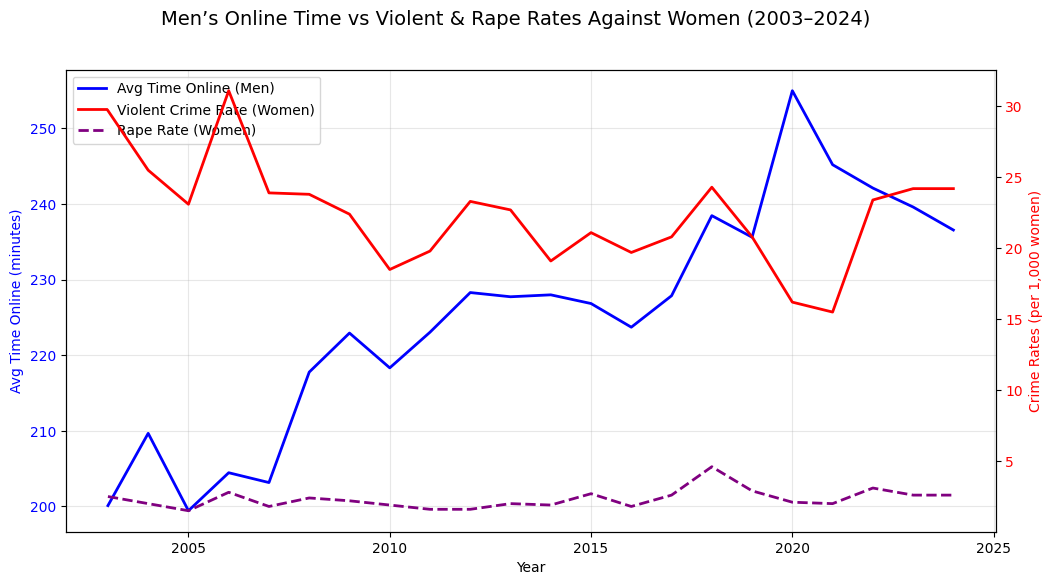

In [41]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# Left y-axis: Men’s time online
ax1.plot(merged_df['Year'], merged_df['avg_time_online_men'], 
         label='Avg Time Online (Men)', color='blue', linewidth=2)
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg Time Online (minutes)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis: Crime rates against women
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['violent_rate_women'], 
         label='Violent Crime Rate (Women)', color='red', linewidth=2)
ax2.plot(merged_df['Year'], merged_df['rape_rate_women'], 
         label='Rape Rate (Women)', color='purple', linewidth=2, linestyle='--')
ax2.set_ylabel("Crime Rates (per 1,000 women)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
fig.suptitle("Men’s Online Time vs Violent & Rape Rates Against Women (2003–2024)", fontsize=14)
ax1.grid(True, alpha=0.3)

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

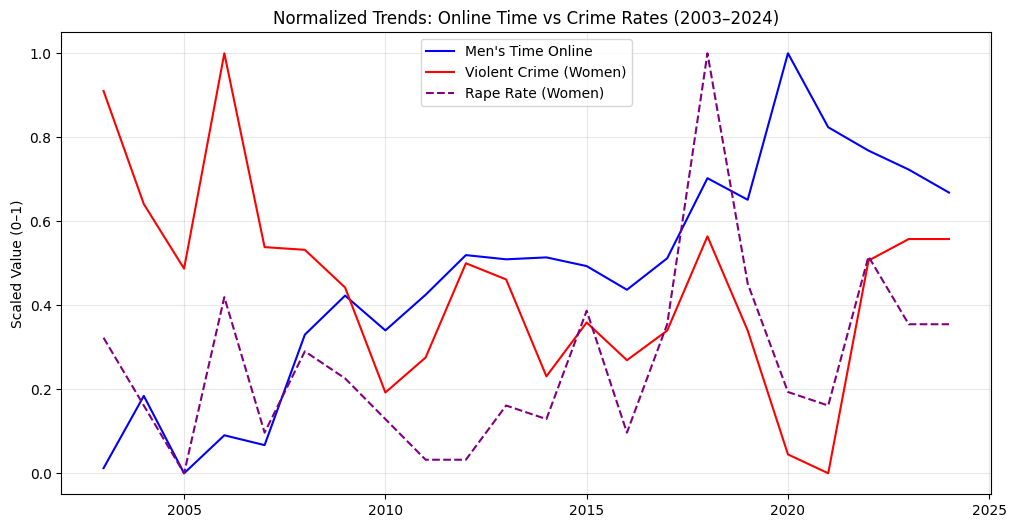

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(merged_df[['avg_time_online_men',
                                         'violent_rate_women',
                                         'rape_rate_women']])
scaled_df = merged_df.copy()
scaled_df[['time_scaled','violent_scaled','rape_scaled']] = scaled

plt.figure(figsize=(12,6))
plt.plot(scaled_df['Year'], scaled_df['time_scaled'], label="Men's Time Online", color='blue')
plt.plot(scaled_df['Year'], scaled_df['violent_scaled'], label="Violent Crime (Women)", color='red')
plt.plot(scaled_df['Year'], scaled_df['rape_scaled'], label="Rape Rate (Women)", color='purple', linestyle='--')

plt.title("Normalized Trends: Online Time vs Crime Rates (2003–2024)")
plt.ylabel("Scaled Value (0–1)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [43]:
print(merged_df[['avg_time_online_men','violent_rate_women','rape_rate_women']].corr())

                     avg_time_online_men  violent_rate_women  rape_rate_women
avg_time_online_men             1.000000           -0.595288         0.318386
violent_rate_women             -0.595288            1.000000         0.313489
rape_rate_women                 0.318386            0.313489         1.000000
